In [2]:
import joblib
import pandas as pd
from pydantic import BaseModel, Field
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv("../data/IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
X, y = df.drop(["species"], axis = 1), df["species"]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.5, random_state = 42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred[:10]

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor'], dtype=object)

In [5]:
y_test[:10].values

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor'], dtype=object)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        29
Iris-versicolor       0.96      1.00      0.98        23
 Iris-virginica       1.00      0.96      0.98        23

       accuracy                           0.99        75
      macro avg       0.99      0.99      0.99        75
   weighted avg       0.99      0.99      0.99        75



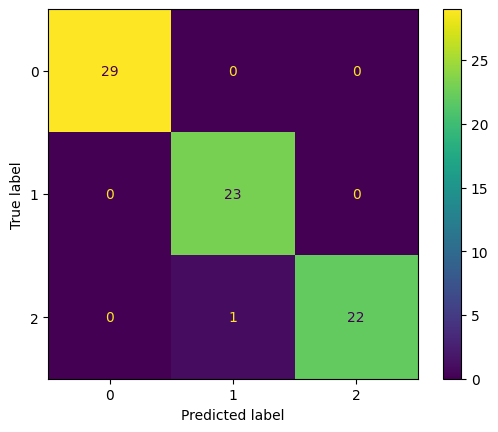

In [6]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot();

In [ ]:
clf.fit(X, y)
joblib.dump(clf, "models/iris_classifier.joblib", compress=("xz", 3), protocol=5)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
clf = joblib.load("models/iris_classifier.joblib")
sample_test_data = pd.DataFrame(X_test.iloc[0]).T
sample_test_data

In [ ]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
...,...,...,...,...
113,5.7,2.5,5.0,2.0
33,5.5,4.2,1.4,0.2
138,6.0,3.0,4.8,1.8
101,5.8,2.7,5.1,1.9


In [ ]:
y_test.iloc[0]

In [ ]:
clf.predict(sample_test_data)